In [1]:
import cv2
from MTGCardDetection import getCardName, get_cards_in_set, getPrediction
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from scipy.signal import wiener

In [2]:
cards, prices = get_cards_in_set('soi')

In [3]:
import requests

def get_picture(save_path=None):
    url = "http://192.168.178.51/capture"  # Replace <ESP32_CAM_IP> with the actual IP address of your ESP32-CAM
    response = requests.get(url)
    
    if response.status_code == 200:
        if save_path:
            with open(save_path, "wb") as file:
                file.write(response.content)
            print(f"Image saved as {save_path}")
        else:
            image_array = np.frombuffer(response.content, dtype=np.uint8)
            # Decode the image array to an OpenCV image
            image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
            #img_cropped = image[480:1150, 220:1400]
            return image
    else:
        print("Failed to capture image")
        
def show_image(image):
    # Convert the image from BGR to RGB color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')  # Do not show axes
    plt.show()

def deblur_image(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply the Wiener filter
    deblurred_image = wiener(gray_image, (1, 1))
    # Convert the deblurred image back to BGR
    deblurred_image_bgr = cv2.cvtColor(deblurred_image.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    return deblurred_image_bgr

def sharpen_image(image):

    sharpening_kernel = np.array([
        [-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]
    ])
    sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
    sharpened_image = cv2.filter2D(sharpened_image, -1, sharpening_kernel)
    #sharpened_image = cv2.filter2D(sharpened_image, -1, sharpening_kernel)

    return sharpened_image

def capture_and_save_image(filename='test.png'):
    """
    Captures an image from the webcam and saves it as a PNG file.

    Parameters:
    - filename: str, the name of the file to save the image as.
    """
    # Open a connection to the webcam (0 is the default camera)
    cap = cv2.VideoCapture(1)

    if not cap.isOpened():
        raise ValueError("Could not open webcam")

    # Capture a single frame
    ret, frame = cap.read()

    if not ret:
        raise ValueError("Failed to capture image")

    # Save the captured image as a PNG file
    cv2.imwrite(filename, frame)

    # Release the webcam
    cap.release()
    return frame

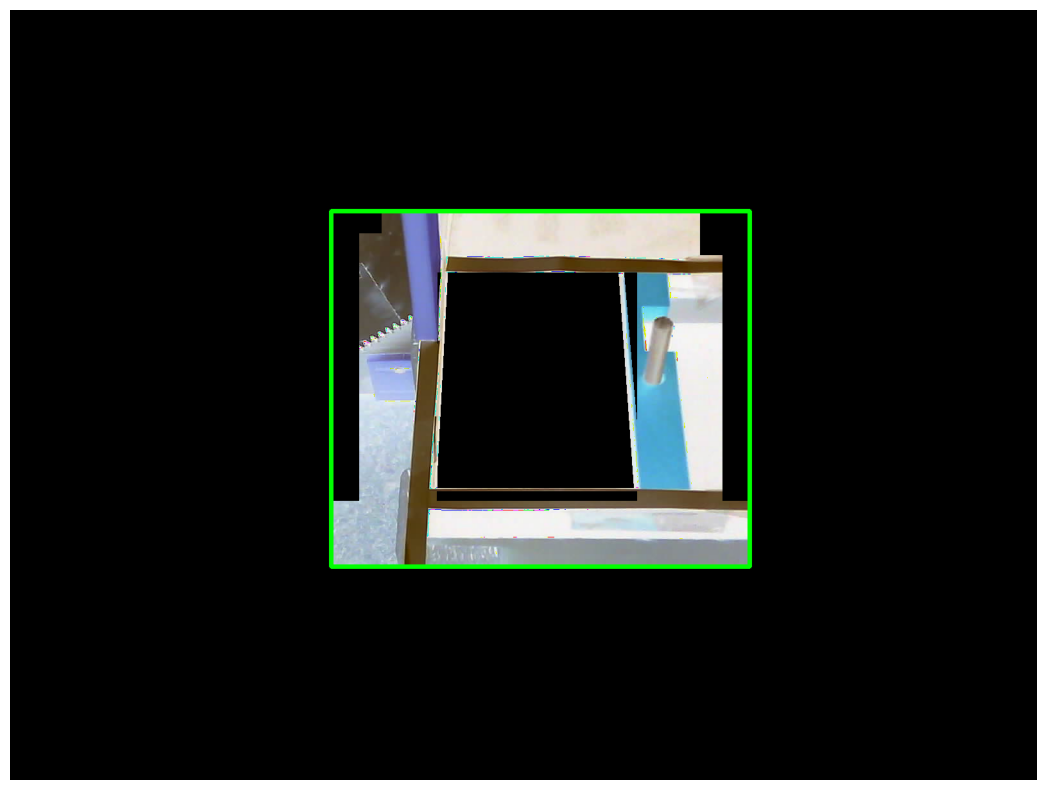

In [4]:
img_orig = get_picture()
img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
name, img_new = getCardName(img_rgb, cards, prices)
#name = getPrediction(img_rgb, cards, prices,(810,1030,760,790))
cv2.imwrite('test.png', cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
if img_orig is not None:
    total_img = np.hstack((img_rgb, img_new))
    
    plt.figure(figsize=(20, 10))
    plt.imshow(img_new)
    plt.axis('off') 
    plt.show()
else:
    print("No image to display")

In [24]:
name, img_new = getCardName(img_rgb, cards, prices)
name

Deny Existence


'Deny Existence'

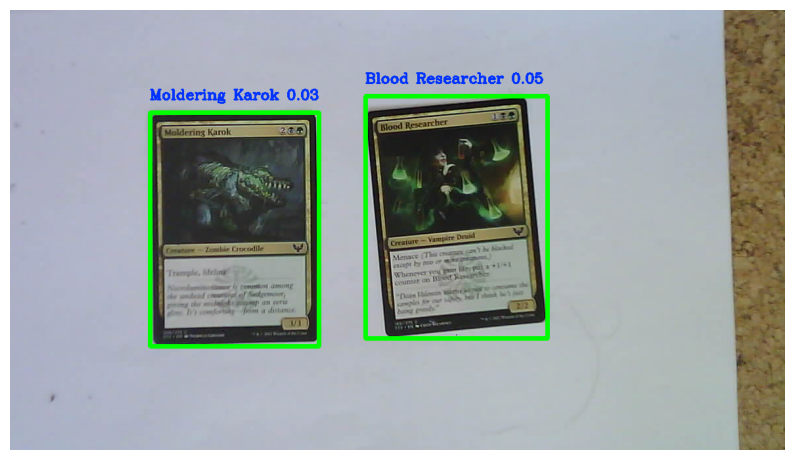

In [16]:
if img_new is not None:
    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()
else:
    print("No image to display")

(1200, 1600, 3)


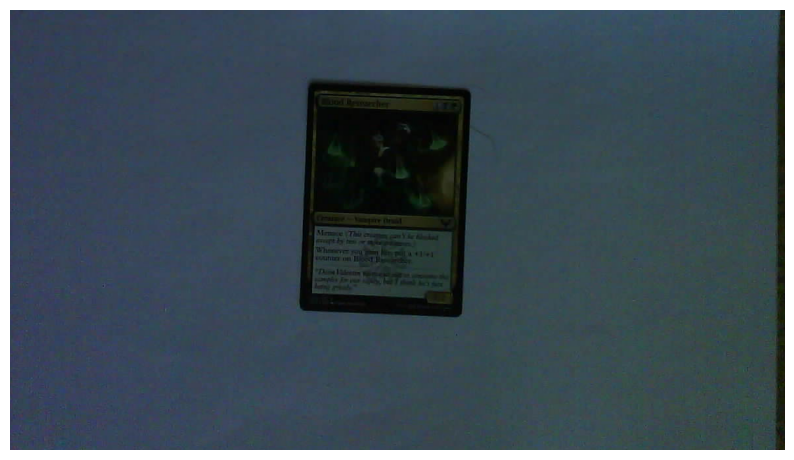

In [44]:
print(img_new.shape)
img_cropped = img_new[480:1150, 220:1400]
show_image(img_cropped)

In [1]:
import requests

def get_card_details(cardname):
    """
    Given a card name, look up the card's details on Scryfall.

    Args:
        cardname (str): The name of the card to look up.

    Returns:
        dict: A dictionary containing the card's details, or None if the card is not found.
    """
    url = f"https://api.scryfall.com/cards/named?exact={cardname}"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code} - {response.reason}")
        return None

# Example usage:
# card_details = get_card_details("Black Lotus")
# if card_details:
#     print(card_details)

In [4]:
get_card_details('sol ring')

{'object': 'card',
 'id': 'd1d8d32d-ebb2-46c2-b909-b7f71d33159e',
 'oracle_id': '6ad8011d-3471-4369-9d68-b264cc027487',
 'multiverse_ids': [],
 'tcgplayer_id': 562505,
 'name': 'Sol Ring',
 'lang': 'en',
 'released_at': '2024-08-02',
 'uri': 'https://api.scryfall.com/cards/d1d8d32d-ebb2-46c2-b909-b7f71d33159e',
 'scryfall_uri': 'https://scryfall.com/card/mb2/233/sol-ring?utm_source=api',
 'layout': 'normal',
 'highres_image': True,
 'image_status': 'highres_scan',
 'image_uris': {'small': 'https://cards.scryfall.io/small/front/d/1/d1d8d32d-ebb2-46c2-b909-b7f71d33159e.jpg?1723010128',
  'normal': 'https://cards.scryfall.io/normal/front/d/1/d1d8d32d-ebb2-46c2-b909-b7f71d33159e.jpg?1723010128',
  'large': 'https://cards.scryfall.io/large/front/d/1/d1d8d32d-ebb2-46c2-b909-b7f71d33159e.jpg?1723010128',
  'png': 'https://cards.scryfall.io/png/front/d/1/d1d8d32d-ebb2-46c2-b909-b7f71d33159e.png?1723010128',
  'art_crop': 'https://cards.scryfall.io/art_crop/front/d/1/d1d8d32d-ebb2-46c2-b909-b7f

In [6]:
db = sqlite3.connect('cards.db')
db_cursor = db.cursor()

In [22]:
command = '''
INSERT INTO cards (name, set_name)
VALUES ('powerbalance', 'hehe')

'''

In [23]:
db_cursor.execute(command)

In [24]:
table_name = 'cards'  # Replace with your actual table name
query = f"SELECT * FROM {table_name};"

# Execute the query
db_cursor.execute(query)

# Fetch all results
rows = db_cursor.fetchall()

# Get column names
column_names = [description[0] for description in db_cursor.description]

# Create a DataFrame for better readability
df = pd.DataFrame(rows, columns=column_names)

# Display the DataFrame
df

,id,name,set_name
0,1,powerbalance,hehe
1,2,powerbalance,hehe


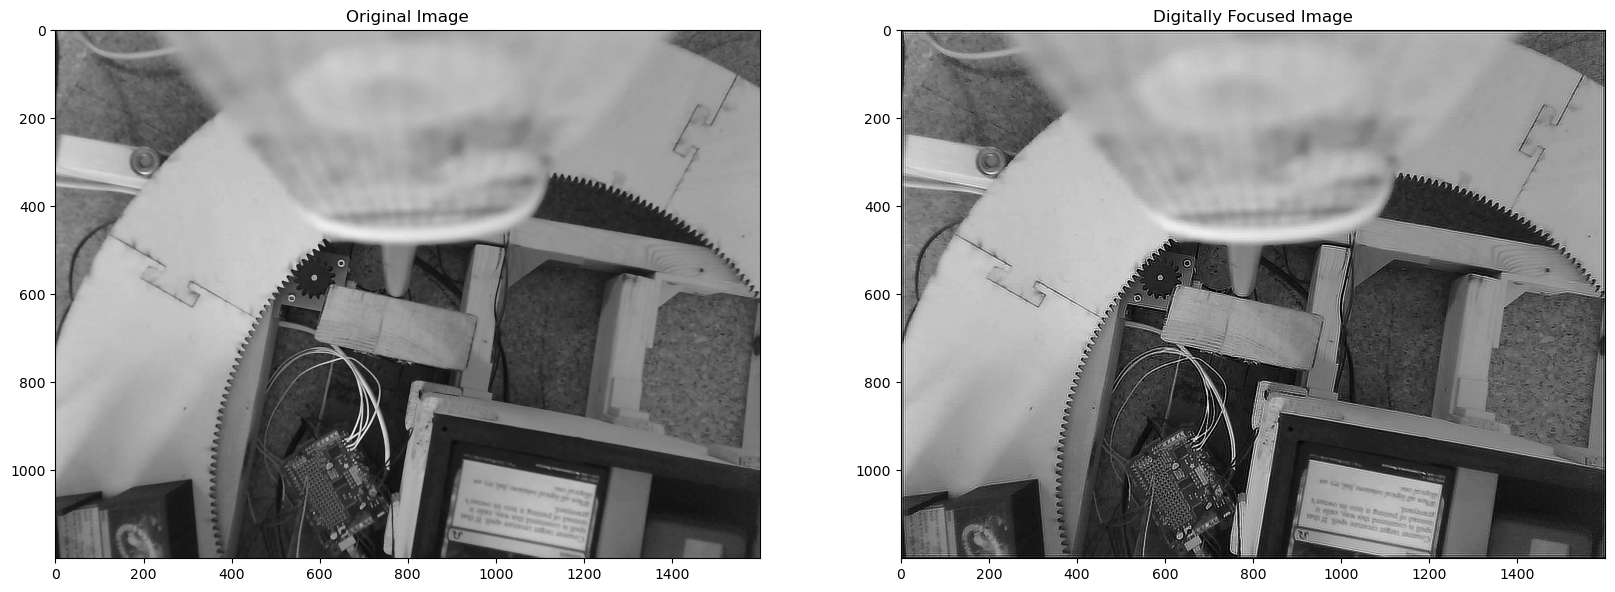

In [33]:
from skimage.restoration import richardson_lucy
from skimage import io, color, img_as_float
import numpy as np
import matplotlib.pyplot as plt

# Load the blurry image
img = get_picture()
gray_img = color.rgb2gray(img)

# Create a motion blur kernel (PSF)
psf = np.ones((5, 5)) / 25  # Change kernel size for different effects

# Perform Richardson-Lucy deconvolution (blind deconvolution)
deblurred_img = richardson_lucy(gray_img, psf, num_iter=30)

# Display the result
plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(gray_img, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(deblurred_img, cmap='gray'), plt.title('Digitally Focused Image')
plt.show()

In [2]:
ls = ['1,2,3,4,5,6,7,8,9,10','as']
[print(l) for l in ls if 'l % 2 == 0' in l]

[]

In [7]:
import os

def extract_file_names(folder_path):
    file_names = []
    for file_name in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file_name)):
            file_names.append(file_name)

    return file_names

extract_file_names('./web_server')

['.gitignore',
 '.gitlab-ci.yml',
 'package-lock.json',
 'package.json',
 'README.md']

In [9]:
import pandas as pd
acc_df = pd.DataFrame()